If your data is stored in a CSV file, you can use **Pandas** to read the CSV file into a DataFrame and then apply the peak and trough detection just as before. Here’s how to handle data from a CSV file:

### Example: Read CSV and Detect Peaks and Troughs

1. **Step 1**: Make sure your CSV file has a column for time (e.g., `Time` or `Date`) and a column for price (e.g., `Price`).

2. **Step 2**: Use `pandas.read_csv()` to load the CSV data into a DataFrame.

3. **Step 3**: Apply the peak and trough detection using the `find_peaks()` function.

### Full Code Example:


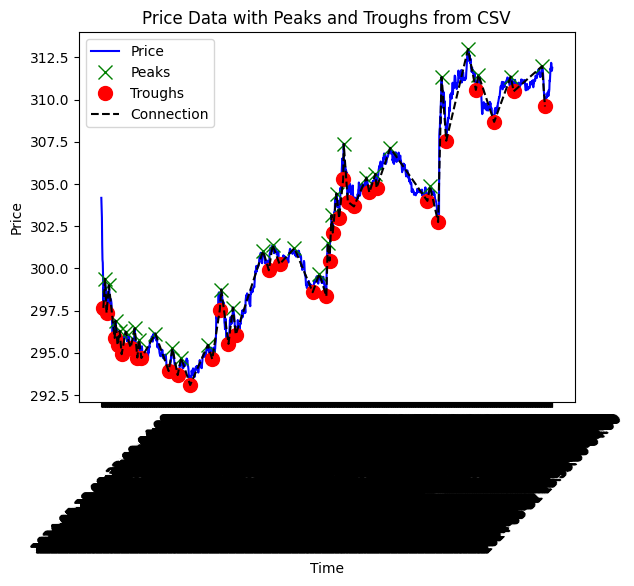

Peak widths: [  4.67950943   4.25026838   2.98731121   2.80610278  11.12426555
   5.61205033   5.59110792  26.50943488  10.93454804   9.91305074
   9.48814368  24.3304526    8.62439092   9.18083241 164.98062531
  24.38890396  19.48200788   2.49052946   2.9545182    7.34957413
  19.33285544   6.00975787   6.72509294 107.00248686  12.32567551
  12.4850818   64.44524773   7.36422932   6.37720725  35.18391492]
Trough widths: [  1.64801412   4.0844682    3.51652843   3.51341958  10.78790562
  16.64302244   7.39707187  34.07315557  16.33005283  16.28990696
 385.29775437   3.81946869   4.00459877  28.53530018  11.00075845
  15.07799989  15.23524377  16.90598475  75.5909256    3.45733378
   3.14790784   4.09407823   1.76595165   3.40145183  96.17961223
  11.79417306   2.50018425   8.97973579  96.24059272  15.11655792
   6.89637496  65.16556388   7.71623102  19.79766548]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Step 1: Read data from a CSV file
df = pd.read_csv('../../data/LULU_max_2024-05-28_2024-05-31_1m.csv')

# Step 2: Assuming the CSV has 'Datetime' and 'Close' columns
price_data = df['Close']
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Step 3: Adjust parameters for peak detection
prominence_value = 0.8  # Adjust this to change peak prominence
width_value = 1.5     # Adjust this to change peak width
height_value = None   # Set a value or None for no height restriction
distance_value = 10    # Minimum distance between peaks

# Detect peaks with adjusted parameters
peaks, properties = find_peaks(price_data, prominence=prominence_value, width=width_value, height=height_value, distance=distance_value)

# Step 4: Detect troughs (inverted peaks)
troughs, trough_properties = find_peaks(-price_data, prominence=prominence_value, width=width_value, height=height_value, distance=distance_value)

# Combine and sort peaks and troughs by time
extrema_indices = np.sort(np.concatenate((peaks, troughs)))

# Step 5: Plot the data
plt.plot(df['Datetime'], price_data, label="Price", color='blue')
plt.plot(df['Datetime'][peaks], price_data[peaks], "x", label="Peaks", color="green", markersize=10)
plt.plot(df['Datetime'][troughs], price_data[troughs], "o", label="Troughs", color="red", markersize=10)

# Step 6: Draw lines connecting the peaks and troughs
plt.plot(df['Datetime'][extrema_indices], price_data[extrema_indices], label="Connection", color="black", linestyle='--')

# Add labels and legend
plt.xticks(rotation=45)
plt.title("Price Data with Peaks and Troughs from CSV")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()

# Show the plot
plt.show()

# Print widths of peaks and troughs (optional)
print("Peak widths:", properties['widths'])
print("Trough widths:", trough_properties['widths'])



### Step-by-Step Breakdown:
1. **Read CSV**: 
   ```python
   df = pd.read_csv('your_data.csv')
   ```
   Replace `'your_data.csv'` with the path to your CSV file.

2. **Assuming CSV Structure**: The CSV file is assumed to have columns like `Time` (or `Date`) and `Price`. Adjust column names accordingly.

3. **Detect Peaks and Troughs**: We use `find_peaks()` for peaks and inverted peaks (`-price_data`) for troughs.

4. **Plotting**: Plot both peaks and troughs on the same graph using the `Time` and `Price` columns.

### Customizing for Your Data:
- If your CSV has different column names, replace `'Time'` and `'Price'` with the correct names.
- You can adjust `prominence`, `width`, or `distance` parameters to fine-tune sensitivity.

This will allow you to analyze and visualize peaks and troughs from a CSV file.

## Adjusting the **prominence**, **width**, and **height** parameters

Adjusting the **prominence**, **width**, and **height** parameters in the `find_peaks()` function allows you to control how peaks and troughs are detected in your data. Each parameter affects the sensitivity of peak detection and can help you filter out smaller fluctuations that are not significant in your analysis.

Here’s a breakdown of how to adjust these parameters, along with examples of how you can apply them in your existing code:

### Key Parameters for `find_peaks()`

1. **prominence**: This controls how prominent a peak must be relative to its surrounding data points. A higher value means only more significant peaks will be detected.

2. **width**: This specifies the minimum width of the peaks. A higher value means that only wider peaks will be detected.

3. **height**: This sets a minimum height for the peaks. If a peak’s height is below this value, it will not be detected.

4. **distance**: This sets the minimum horizontal distance (in terms of indices) between adjacent peaks. This can help reduce the number of closely spaced peaks.

### Example Code with Adjusted Parameters

Here’s how you can adjust these parameters in your existing code:


### Adjusting Parameters:
- **Prominence**: Increase this value to detect only more significant peaks.
- **Width**: Increase this to require wider peaks.
- **Height**: Set a specific height to filter out smaller peaks, or set it to `None` to allow all heights.
- **Distance**: Increase this value to reduce the number of closely spaced peaks.

### Example Values to Try:
- **Prominence**: `2`, `5`, or even higher if your data has a lot of noise.
- **Width**: `2`, `3`, or more to capture only broader peaks.
- **Height**: `10` (or whatever value is appropriate based on your dataset).
- **Distance**: `2`, `3`, or more to avoid detecting peaks that are too close to each other.

### Tips:
- Experiment with these parameters based on your specific data and the kind of peaks you are interested in detecting.
- After adjusting, visualize the results to see how well the detected peaks align with your expectations.

The **prominence** parameter in the `find_peaks()` function determines how much a peak stands out from its surrounding data points. It measures the vertical distance between the peak and the lowest point of the valley that connects it to neighboring peaks. 

### Value Range of Prominence

1. **Minimum Value**: 
   - The minimum value for prominence is `0`. This means that even the smallest fluctuations will be considered as peaks. 

2. **Typical Values**: 
   - The typical values for prominence depend on the data you are working with. If your data has significant noise or fluctuations, you might want to set the prominence to a higher value (e.g., `1`, `2`, `5`, etc.) to filter out minor peaks.
   - In contrast, if your data has well-defined peaks, a lower prominence (like `0.1` or `0.5`) may be sufficient to detect the peaks of interest.

3. **Max Value**:
   - The maximum value for prominence theoretically could be set to the maximum height of the peak itself. However, in practice, setting it too high will lead to detecting fewer peaks, as many will be ignored.

### Choosing the Right Prominence Value

When choosing the appropriate prominence value, consider the following:

- **Data Characteristics**: Analyze your data visually to determine how pronounced the peaks are.
- **Noise Level**: If your data has a lot of noise, you may need a higher prominence to avoid false positives.
- **Desired Sensitivity**: Adjust the prominence based on how sensitive you want your peak detection to be. Start with a low value and gradually increase it until you achieve the desired results.

### Example in Practice

If you have price data ranging from `0` to `100`, setting a prominence of `1` might detect smaller peaks, while a prominence of `5` might only detect larger price movements.

### Testing Different Values

Here’s a simple approach to test various prominence values using your existing code:


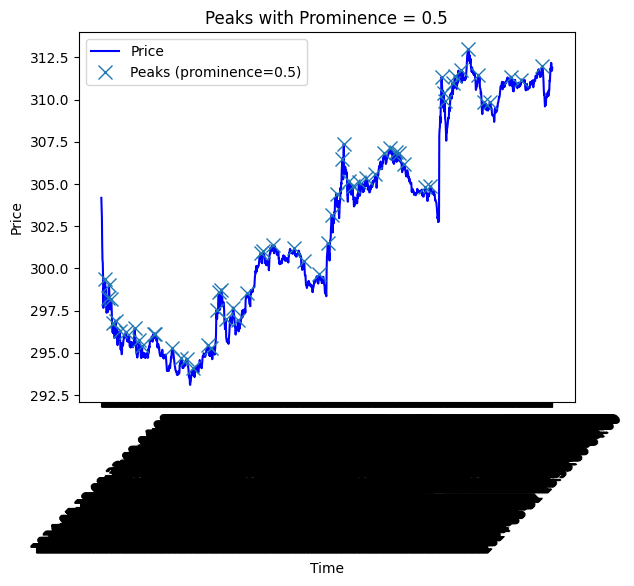

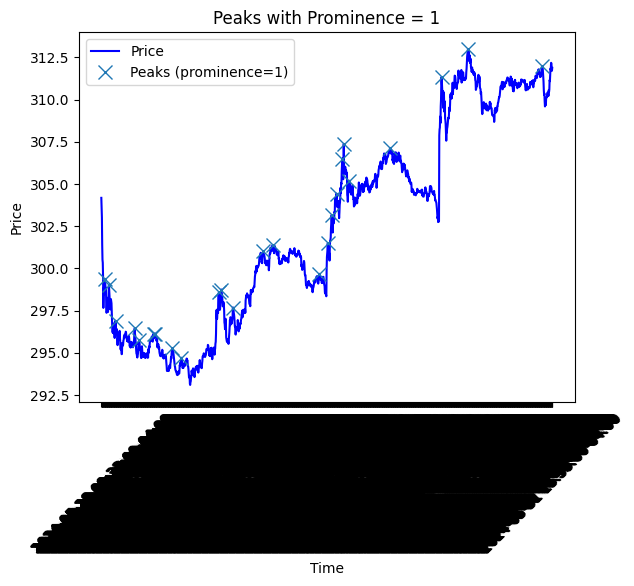

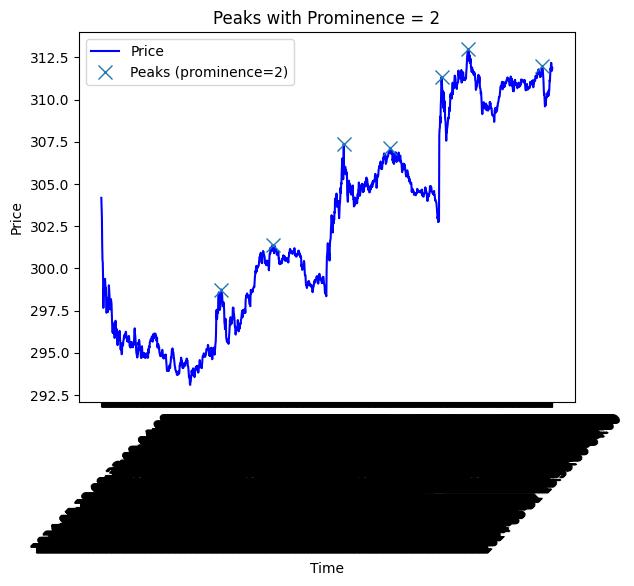

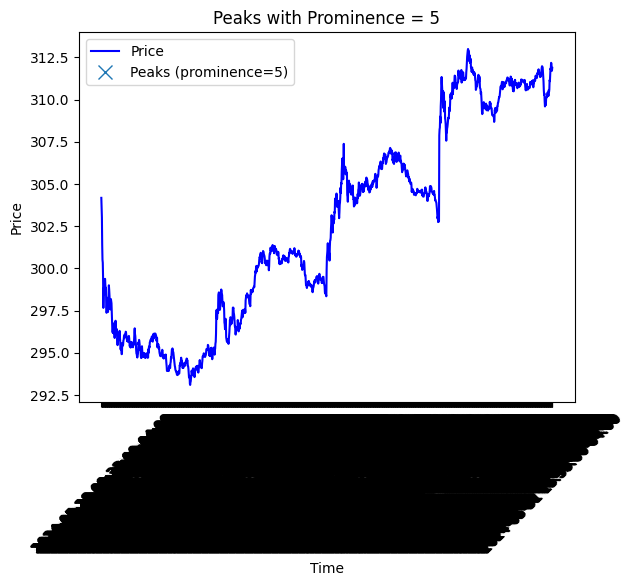

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Step 1: Read data from a CSV file
df = pd.read_csv('../../data/LULU_max_2024-05-28_2024-05-31_1m.csv')

# Step 2: Assuming the CSV has 'Datetime' and 'Close' columns
price_data = df['Close']
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Step 3: Adjust parameters for peak detection
prominence_value = 0.8  # Adjust this to change peak prominence
width_value = 1.5     # Adjust this to change peak width
height_value = None   # Set a value or None for no height restriction
distance_value = 10    # Minimum distance between peaks
prominence_values = [0.5, 1, 2, 5]

for prominence in prominence_values:
    peaks, properties = find_peaks(price_data, prominence=prominence)
    plt.plot(df['Datetime'], price_data, label="Price", color='blue')
    plt.plot(df['Datetime'][peaks], price_data[peaks], "x", label=f"Peaks (prominence={prominence})", markersize=10)
    plt.title(f"Peaks with Prominence = {prominence}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()



This will allow you to visualize how changing the prominence affects the detected peaks. Adjust and refine the value until you find the best fit for your data analysis needs.